# 决策树练习

这次练习中，我们将使用葡萄酒质量数据集。该数据集包含葡萄酒的各种化学性质，如酸度、糖分、PH值和酒精含量等，还包括两列分别表示葡萄酒的质量（3-9，越高越好）和酒的颜色（红或者白）。数据保存在`Wine_Quality_Data.csv`文件中。

## 第一步：

* 导入数据并检查特征的类型
* 使用所有特征预测 `color` (white 或者 red)，但是颜色特征需要编码成整数

In [1]:
# 读入数据
import pandas as pd

data = pd.read_csv("Wine_Quality_Data.csv")

data


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [2]:
# 检查特征的数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
# 把color特征值转换成整数（如'white'是0, 'red'是1）
data["color"] = data.color.map(lambda x: 1 if x=='red' else 0)

data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


## 第二步：

* 生成X和y（使用除'color'外的全部特征列做X，‘color'列做y）
* 划分训练集和测试集，使得测试集中包含1000条数据
* 分别检查测试集和训练集中不同类别的样例的个数

In [4]:
# 生成X和y
X = data.drop(columns='color')
y = data['color']



In [5]:
# 划分训练集和测试集，使得测试集中包含1000条数据
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=10)


In [6]:
# 分别检查测试集和训练集中不同类别的样例的个数
print(y_train.value_counts())
print(y_test.value_counts())

color
0    4150
1    1347
Name: count, dtype: int64
color
0    748
1    252
Name: count, dtype: int64


## 第三步：

* 在训练集上训练一个没有对树的最大深度、特征及叶子节点等方面有任何限制的决策树分类器
* 绘制并显示决策树
* 评价这棵树分别在训练数据和测试数据上的预测效果（精度、查全率、查准率、F1），并思考其现象

In [18]:
# 在训练集上训练一个没有对树的最大深度、特征及叶子节点等方面有任何限制的决策树分类器
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier()

treeclf.fit(X_train, y_train)


DecisionTreeClassifier()

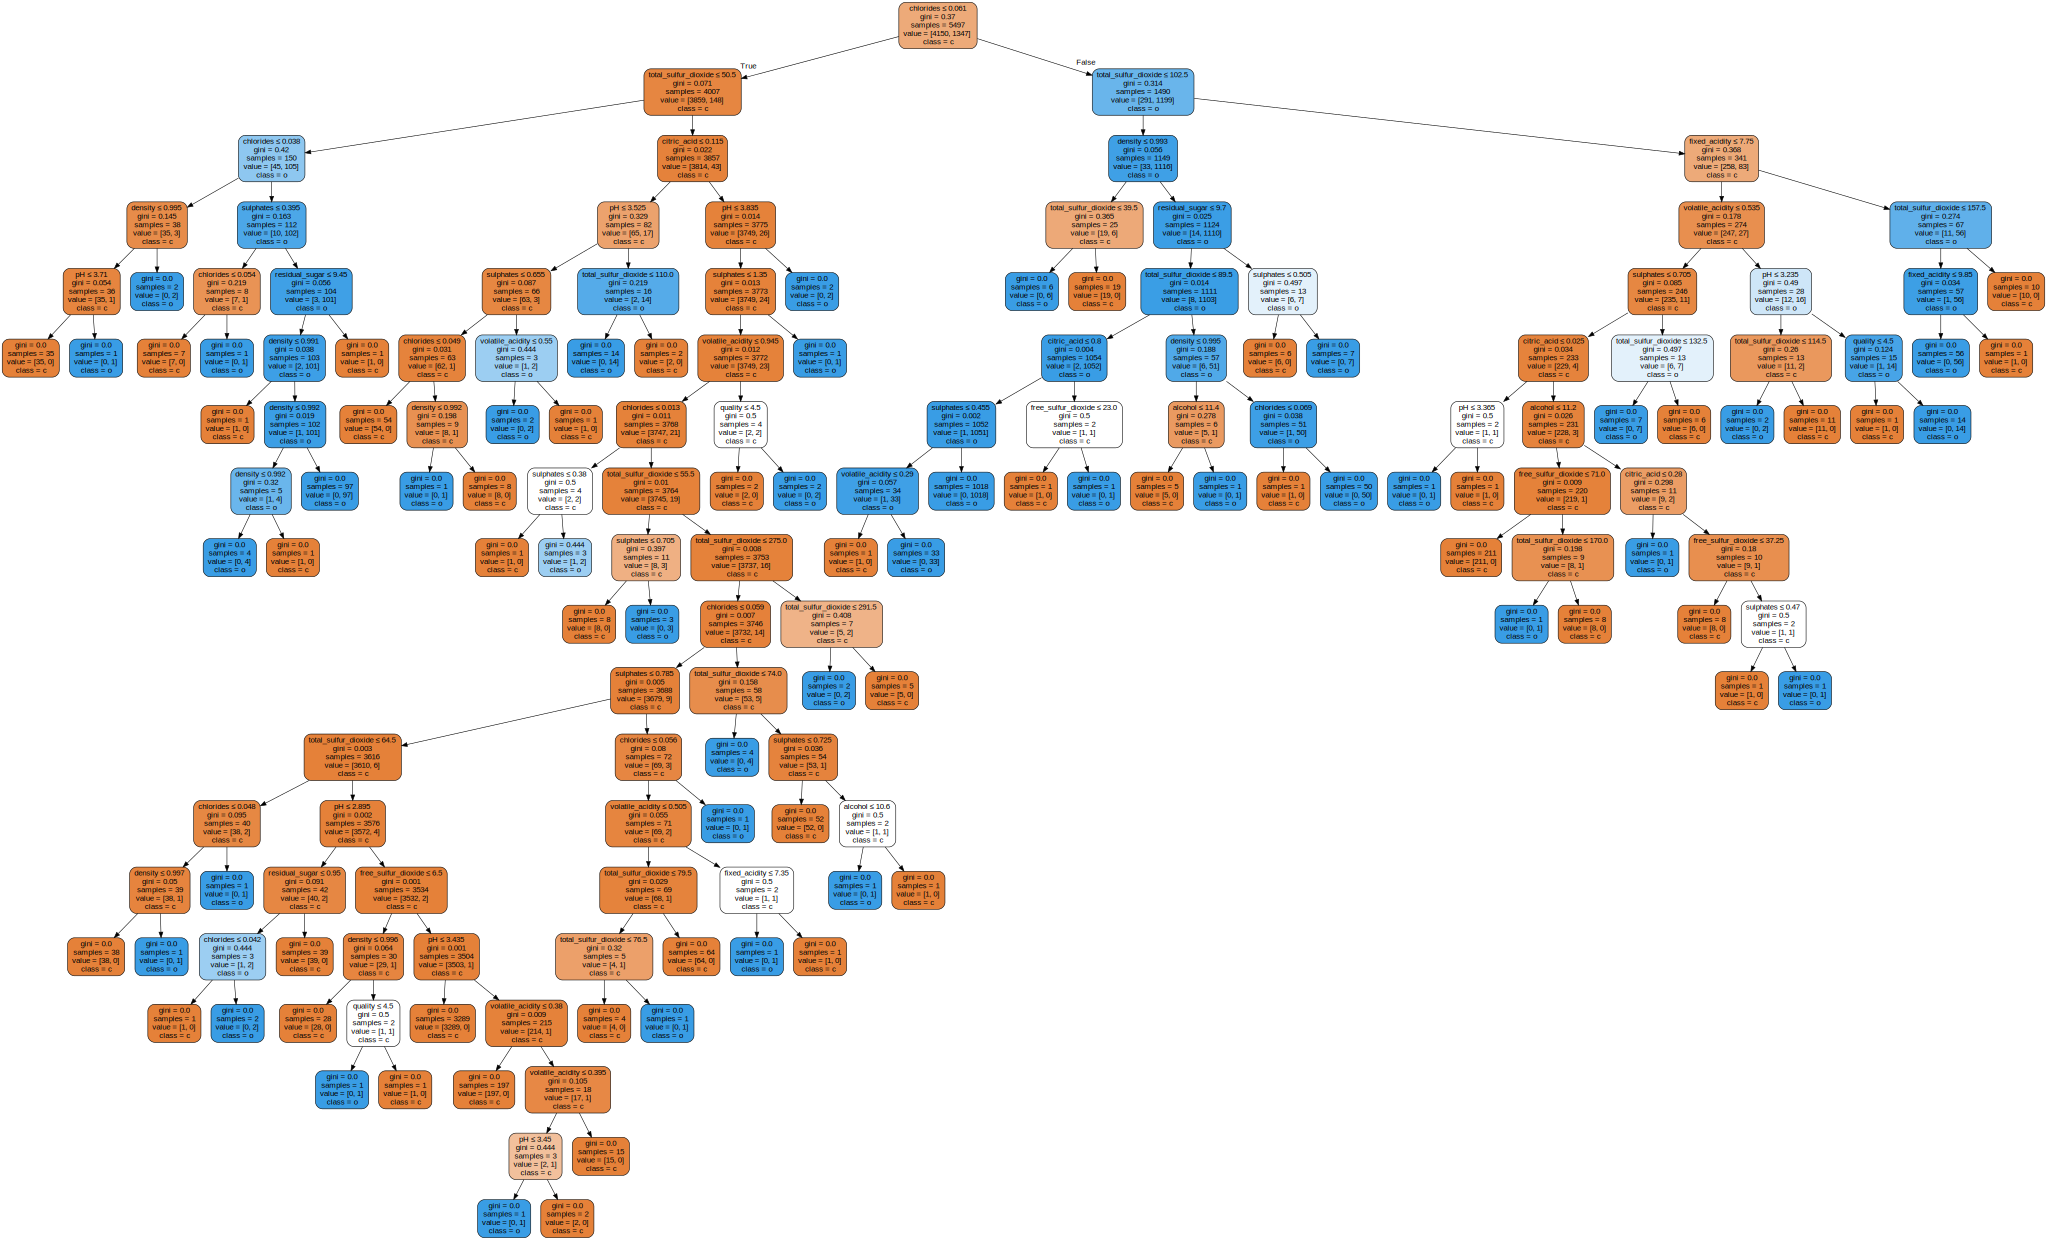

In [19]:
# 绘制并显示决策树
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(treeclf, out_file=None, 
                         feature_names=X_train.columns.values.tolist(),
                         class_names="color",  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)

graph


In [20]:
# 评价这棵树分别在训练数据和测试数据上的预测效果
from sklearn import metrics

y_train_pred = treeclf.predict(X_train)
y_test_pred = treeclf.predict(X_test)

print("训练数据")
print("accruacy:", metrics.accuracy_score(y_train, y_train_pred))
print("precision:", metrics.precision_score(y_train, y_train_pred, average = "micro"))
print("recall:", metrics.recall_score(y_train, y_train_pred, average = "micro"))
print("fscore:", metrics.f1_score(y_train, y_train_pred, average = "micro"))

print("测试数据")
print("accruacy:", metrics.accuracy_score(y_test, y_test_pred))
print("precision:", metrics.precision_score(y_test, y_test_pred, average = "micro"))
print("recall:", metrics.recall_score(y_test, y_test_pred, average = "micro"))
print("fscore:", metrics.f1_score(y_test, y_test_pred, average = "micro"))


训练数据
accruacy: 0.9998180825905039
precision: 0.9998180825905039
recall: 0.9998180825905039
fscore: 0.9998180825905039
测试数据
accruacy: 0.99
precision: 0.99
recall: 0.99
fscore: 0.99


## 第四步：

* 使用带交叉验证的网格搜索（调节'max_depth'和‘max_features'两个参数，并使用'accuracy’为评价指标），得到一个更好的决策树分类器。
* 绘制并显示新的决策树
* 评价这棵树分别在训练数据和测试数据上的预测效果（精度、查全率、查准率、F1），并和第三步的结果比较

In [21]:
# 使用带交叉验证的网格搜索，得到一个更好的决策树分类器。。
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1,21), 'max_features': range(1,13)}

grid = GridSearchCV(treeclf, param_grid, cv = 14, scoring = "accuracy")

grid.fit(X_train,y_train)

grid.best_params_


{'max_depth': 12, 'max_features': 12}

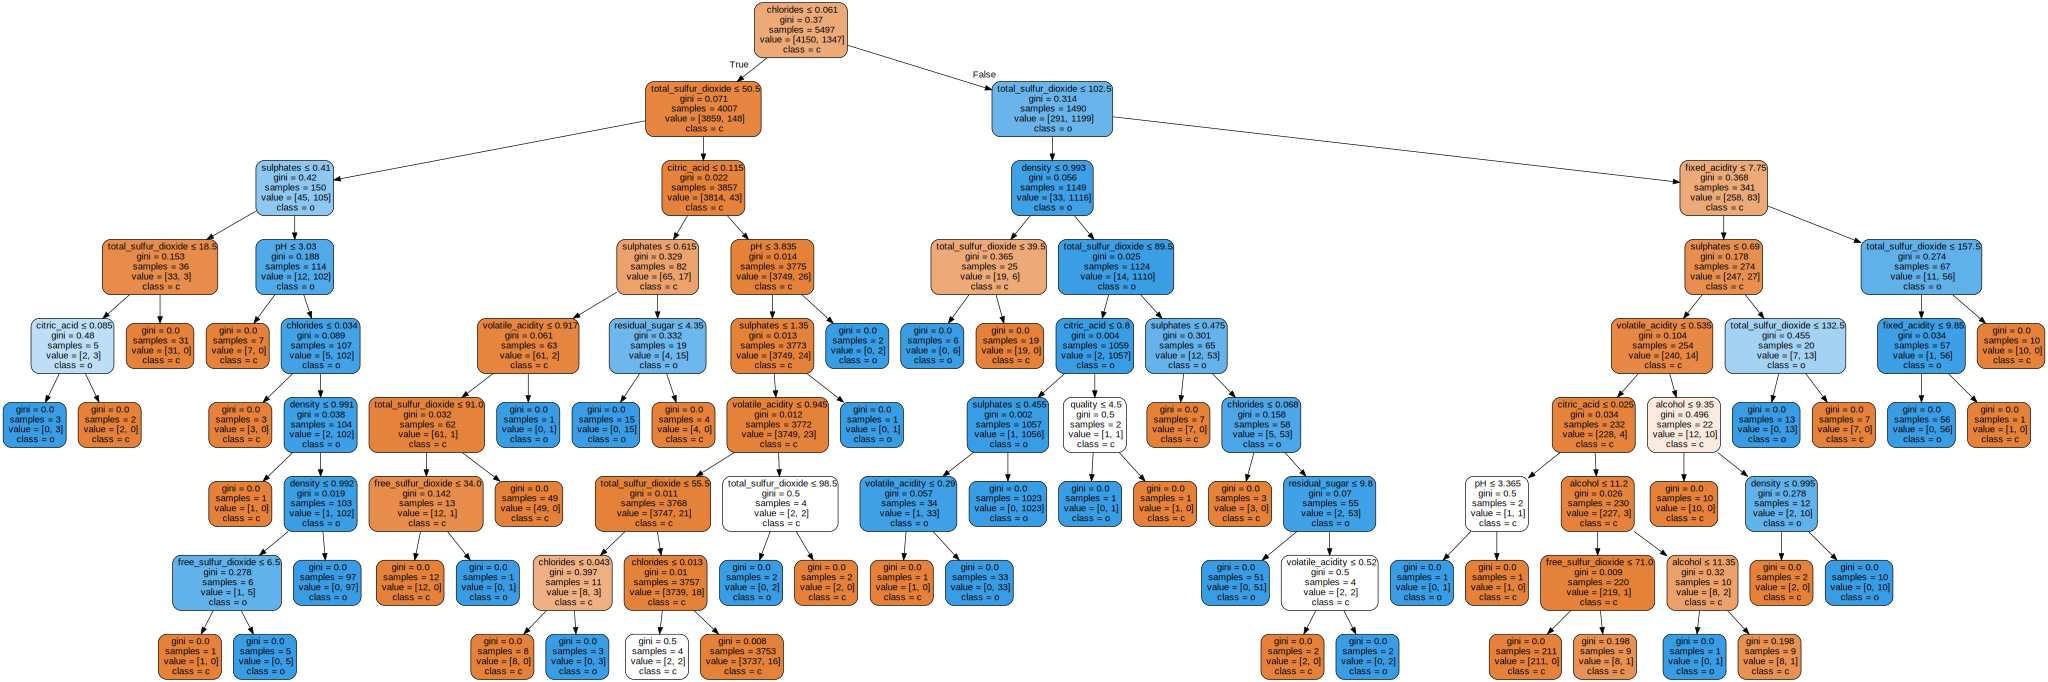

In [22]:
# 绘制并显示新的决策树
treeclf_new = DecisionTreeClassifier(max_depth = 8, max_features = 10)

treeclf_new.fit(X_train, y_train)

dot_data = tree.export_graphviz(treeclf_new, out_file=None, 
                         feature_names=X_train.columns.values.tolist(),
                         class_names="color",  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)

graph


In [23]:
# 评价这棵树分别在训练数据和测试数据上的预测效果
from sklearn import metrics

y_train_pred = treeclf_new.predict(X_train)
y_test_pred = treeclf_new.predict(X_test)

print("训练数据")
print("accruacy:", metrics.accuracy_score(y_train, y_train_pred))
print("precision:", metrics.precision_score(y_train, y_train_pred, average = "micro"))
print("recall:", metrics.recall_score(y_train, y_train_pred, average = "micro"))
print("fscore:", metrics.f1_score(y_train, y_train_pred, average = "micro"))

print("测试数据")
print("accruacy:", metrics.accuracy_score(y_test, y_test_pred))
print("precision:", metrics.precision_score(y_test, y_test_pred, average = "micro"))
print("recall:", metrics.recall_score(y_test, y_test_pred, average = "micro"))
print("fscore:", metrics.f1_score(y_test, y_test_pred, average = "micro"))


训练数据
accruacy: 0.9963616518100782
precision: 0.9963616518100782
recall: 0.9963616518100782
fscore: 0.9963616518100782
测试数据
accruacy: 0.987
precision: 0.987
recall: 0.987
fscore: 0.987


## 第五步：

* 重新生成X和y，使用`residual_sugar`列做y，用其他列做X
* 划分训练集和测试集
* 使用带交叉验证的网格搜索，找到一个最优的决策回归树模型
* 评价其在训练和测试数据上的预测效果（均方误差）
* 将测试数据上的真实residual_sugar值和预测的值绘制成一个散点图

In [24]:
# 重新生成X和y，使用residual_sugar列做y，用其他列做X
X = data.drop(columns='residual_sugar')
y = data['residual_sugar']


In [29]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [30]:
# 使用带交叉验证的网格搜索，找到一个最优的决策回归树模型
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

treereg = DecisionTreeRegressor(random_state=1)

treereg.fit(X_train, y_train)

max_depth_range = range(1, 29)

RMSE_scores = []

for depth in max_depth_range:

    treereg = DecisionTreeRegressor(max_depth = depth, random_state=1)
    
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
    
list(zip(max_depth_range, RMSE_scores))


[(1, 4.741239072633135),
 (2, 3.1889097170736256),
 (3, 2.610215699160604),
 (4, 2.3916017059806487),
 (5, 2.2356152411387358),
 (6, 2.229196121510723),
 (7, 2.167757008188377),
 (8, 2.066602506232436),
 (9, 2.0018221979513866),
 (10, 2.0673250953259177),
 (11, 2.08390777597023),
 (12, 2.0757997747622),
 (13, 2.119471135323878),
 (14, 2.2361981922711545),
 (15, 2.2294018727842246),
 (16, 2.2319116824476284),
 (17, 2.222239157013998),
 (18, 2.1067845900167694),
 (19, 2.212633139216555),
 (20, 2.1426911591429527),
 (21, 2.170670224531979),
 (22, 2.205889244162568),
 (23, 2.1438425262611838),
 (24, 2.238045382039718),
 (25, 2.1413105236383827),
 (26, 2.1555130945688252),
 (27, 2.1505878263860905),
 (28, 2.220245551044611)]

In [31]:
# 评价其在训练和测试数据上的预测效果（均方误差）
import numpy as np

treereg_new = DecisionTreeRegressor(max_depth = 10, random_state=1)

treereg_new.fit(X_train, y_train)

y_train_pred = treereg_new.predict(X_train)
y_test_pred = treereg_new.predict(X_test)

print("训练集RMSE:", np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print("测试集RMSE:", np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


训练集RMSE: 0.970373470352095
测试集RMSE: 1.6147127326399038


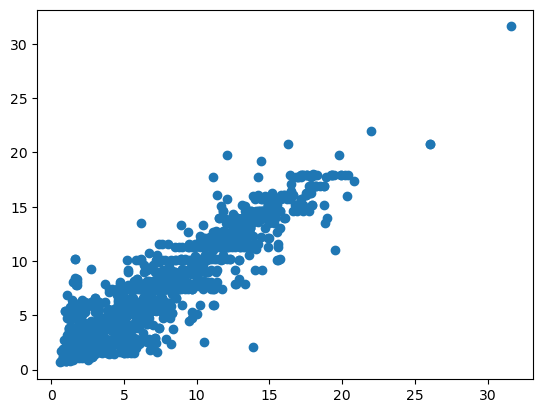

In [32]:
# 将测试数据上的真实residual_sugar值和预测的值绘制成一个散点图
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred)
